## Observations and Insights 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, how = 'inner', on='Mouse ID')
# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [130]:
# Checking the number of mice.
mice = len(mouse_study['Mouse ID'].unique())
mice

249

In [131]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_study[mouse_study.duplicated(['Timepoint', 'Mouse ID'])]
print(mouse_dupes)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [132]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupes = mouse_study[mouse_study.duplicated(['Timepoint', 'Mouse ID'], keep=False)]
print(all_dupes)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [133]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study[mouse_study['Mouse ID'] != 'g989']
mouse_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [134]:
# Checking the number of mice in the clean DataFrame.
mice = len(mouse_clean['Mouse ID'].unique())
mice

248

## Summary Statistics

In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = mouse_clean.groupby(['Drug Regimen'])

regimen_summary = pd.DataFrame()


regimen_summary['Tumor Volume Mean'] = regimen_group['Tumor Volume (mm3)'].mean()
regimen_summary['Tumor Volume Median'] = regimen_group['Tumor Volume (mm3)'].median()
regimen_summary['Tumor Volume Variance'] = regimen_group['Tumor Volume (mm3)'].var()
regimen_summary['Tumor Volume Standard Deviation'] = regimen_group['Tumor Volume (mm3)'].std()
regimen_summary['Tumor Volume SEM'] = regimen_group['Tumor Volume (mm3)'].sem()
regimen_summary = regimen_summary.reset_index()
regimen_summary

,Drug Regimen,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [136]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

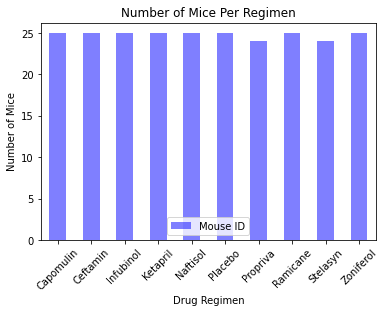

In [153]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_unique = mouse_clean.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_count = pd.DataFrame(mouse_unique)
mouse_count = mouse_count.reset_index()
mouse_plot = mouse_count.plot(kind="bar", color="blue", alpha=0.5, align="center", xlabel = "Drug Regimen", ylabel = "Number of Mice", title = "Number of Mice Per Regimen" )
mouse_plot.set_xticklabels(mouse_count["Drug Regimen"], rotation=45)
plt.show()

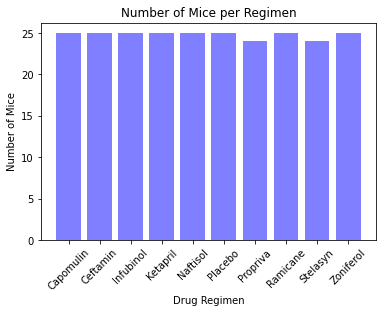

In [151]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


regimen = []
count = []
regimen = mouse_count['Drug Regimen']
count = mouse_count['Mouse ID']
x_axis = np.arange(len(regimen))


plt.bar(x_axis, count, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen, rotation = 45)
plt.title("Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

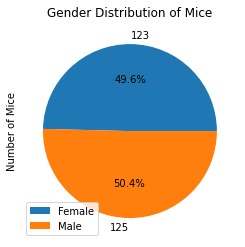

In [280]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = mouse_clean.groupby('Sex')['Mouse ID'].nunique()
gender_count = pd.DataFrame(mouse_gender)
gender_count = gender_count.reset_index()
labels = gender_count['Mouse ID']
gender_plot = gender_count.plot(kind="pie", y ="Mouse ID", title = "Gender Distribution of Mice", labels = labels, autopct="%1.1f%%", use_index = False, x = gender_count['Mouse ID'])
gender_plot.set_ylabel("Number of Mice")
gender_plot.legend(loc=3, labels=gender_count["Sex"])
plt.show()



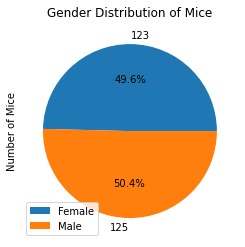

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = mouse_clean.groupby('Sex')['Mouse ID'].nunique()
gender_count = pd.DataFrame(mouse_gender)
gender_count = gender_count.reset_index()

plt.pie(gender_count['Mouse ID'],  labels = labels, autopct="%1.1f%%",  startangle=0)
plt.title("Gender Distribution of Mice")
plt.legend(loc=3, labels=gender_count["Sex"])
plt.ylabel("Number of Mice", )
plt.show()


## Quartiles, Outliers and Boxplots

In [300]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

keep_last = mouse_clean[mouse_clean.duplicated(['Mouse ID'], keep='last')]
last_index = keep_last.index.tolist()
last_group = mouse_clean.drop(index=last_index)
last_group
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [302]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = last_group['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
